### RandomForestClassifier. EDA_Pipeline.
Exploratory data analysis pipeline on Titanic dataset


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics  import accuracy_score, precision_score, recall_score

In [18]:
# Import dataset
titanic = pd.read_csv("C:\\Users\\Asus\\Git\\DS1\Data\\train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
# Count missing values
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
# Fill missing values
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)

<Figure size 432x288 with 0 Axes>

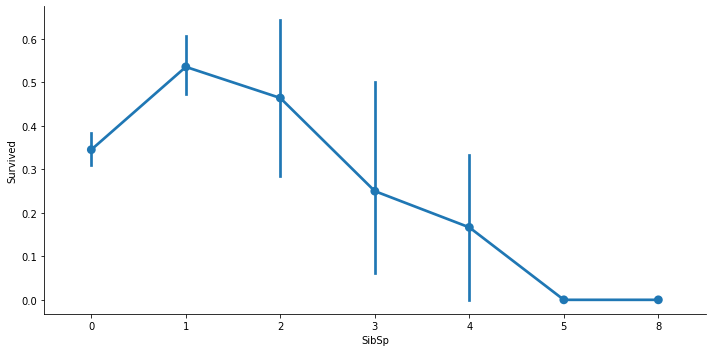

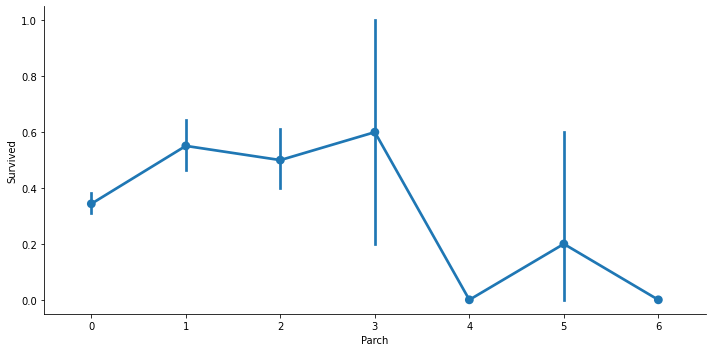

In [21]:
# Combine SibSp & Parch
for i, col in enumerate(['SibSp', 'Parch']):
  plt.figure(i)
  sns.catplot(x=col, y='Survived', data=titanic, kind='point', aspect=2) 

In [22]:
titanic['Family_count'] = titanic['SibSp'] + titanic['Parch']
titanic.drop(['PassengerId', 'SibSp', 'Parch'], axis=1, inplace=True)
titanic.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_count
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0


In [24]:
# Binary Cabin Index
titanic['Cabin_index'] = np.where(titanic['Cabin'].isnull(), 0, 1)

In [26]:
# Sex -> Numeric
sex_numeric = {'male': 0, 'female':1}
titanic['Sex'] = titanic['Sex'].map(sex_numeric)

In [28]:
# More Cleaning
titanic.drop(['Cabin', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Family_count,Cabin_index
0,0,3,0,22.0,7.2500,1,0
1,1,1,1,38.0,71.2833,1,1
2,1,3,1,26.0,7.9250,0,0
3,1,1,1,35.0,53.1000,1,1
4,0,3,0,35.0,8.0500,0,0


In [34]:
# Save the data
titanic.to_csv("C:\\Users\\Asus\\Git\\DS1\Data\\titanic_clean.csv", index=False)

In [35]:
# This step can be skiped , importing prepeared cleaned data from csv
titanic = pd.read_csv("C:\\Users\\Asus\\Git\\DS1\Data\\titanic_clean.csv")
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Family_count,Cabin_index
0,0,3,0,22.0,7.2500,1,0
1,1,1,1,38.0,71.2833,1,1
2,1,3,1,26.0,7.9250,0,0
3,1,1,1,35.0,53.1000,1,1
4,0,3,0,35.0,8.0500,0,0


#### Train Test Split

In [36]:
features = titanic.drop('Survived', axis=1)
labels = titanic['Survived']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [38]:
for data in [y_train, y_val, y_test]:
  print(round(len(data) / len(labels), 2))

0.6
0.2
0.2


### Cross Validation

In [39]:
# Save data
X_train.to_csv("C:\\Users\\Asus\\Git\\DS1\Data\\train_features.csv", index=False)
X_val.to_csv("C:\\Users\\Asus\\Git\\DS1\Data\\val_features.csv", index=False)
X_test.to_csv("C:\\Users\\Asus\\Git\\DS1\Data\\test_features.csv", index=False)

y_train.to_csv("C:\\Users\\Asus\\Git\\DS1\Data\\train_labels.csv", index=False)
y_val.to_csv("C:\\Users\\Asus\\Git\\DS1\Data\\val_labels.csv", index=False)
y_test.to_csv("C:\\Users\\Asus\\Git\\DS1\Data\\test_labels.csv", index=False)

In [40]:
# Import data
train_features = pd.read_csv("C:\\Users\\Asus\\Git\\DS1\Data\\train_features.csv")
train_labels = pd.read_csv("C:\\Users\\Asus\\Git\\DS1\Data\\train_labels.csv")

val_features = pd.read_csv("C:\\Users\\Asus\\Git\\DS1\Data\\val_features.csv")
val_labels = pd.read_csv("C:\\Users\\Asus\\Git\\DS1\Data\\val_labels.csv")

test_features = pd.read_csv("C:\\Users\\Asus\\Git\\DS1\Data\\test_features.csv")
test_labels = pd.read_csv("C:\\Users\\Asus\\Git\\DS1\Data\\test_labels.csv")

In [45]:
rf = RandomForestClassifier()
scores = cross_val_score(rf, train_features, train_labels.values.ravel(), cv=5)
scores

array([0.81308411, 0.81308411, 0.78504673, 0.81308411, 0.82075472])

#### Hyperparameter Tuning

In [141]:
rf = RandomForestClassifier()
hyperparams = {
    'n_estimators': [5, 25, 50, 100],
    'max_depth': [2, 12, 24, None]
}

In [142]:
cross_val = GridSearchCV(rf, hyperparams, cv=5)

In [143]:
cross_val.fit(train_features, train_labels.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 12, 24, None],
                         'n_estimators': [5, 25, 50, 100]})

In [144]:
cross_val.best_estimator_

RandomForestClassifier(max_depth=12, n_estimators=50)

In [145]:
cross_val.best_params_

{'max_depth': 12, 'n_estimators': 50}

In [146]:
cross_val.cv_results_

{'mean_fit_time': array([0.00818572, 0.02333431, 0.04745235, 0.09402986, 0.00659227,
        0.02733297, 0.05545087, 0.11286578, 0.00740042, 0.02991896,
        0.05905805, 0.11572475, 0.00737495, 0.02992153, 0.06103082,
        0.1178998 ]),
 'std_fit_time': array([1.46938150e-03, 7.89930650e-04, 1.73734454e-03, 2.20966139e-03,
        5.01100386e-04, 1.34494506e-03, 1.62187838e-03, 6.44288986e-03,
        4.92610602e-04, 6.24249475e-04, 7.66130845e-04, 8.24307059e-05,
        4.96057741e-04, 6.38579621e-04, 3.24919970e-03, 1.95197467e-03]),
 'mean_score_time': array([0.00218873, 0.00338731, 0.00498185, 0.00848017, 0.00158658,
        0.00298448, 0.00518503, 0.00896473, 0.00119462, 0.00338831,
        0.00536771, 0.00998063, 0.0017951 , 0.00318542, 0.00579052,
        0.00976977]),
 'std_score_time': array([3.93195751e-04, 5.01220016e-04, 6.26109389e-04, 4.49828007e-04,
        4.99438557e-04, 1.21956638e-05, 3.99526390e-04, 1.08236728e-03,
        4.01296832e-04, 4.90854735e-04, 4.76

In [148]:
def results(results):
  print('Optimal Hyperparams: {}\n'.format(results.best_params_))
  means = results.cv_results_['mean_test_score']
  stds = results.cv_results_['std_test_score']

  for mean, std, params in zip(means, stds, results.cv_results_['params']):
    print('Mean {} Standard Deviation {} Hyperparameters {}'.format(round(mean,3), round(std * 2, 3), params))

In [149]:
results(cross_val)

Optimal Hyperparams: {'max_depth': 12, 'n_estimators': 50}

Mean 0.788 Standard Deviation 0.099 Hyperparameters {'max_depth': 2, 'n_estimators': 5}
Mean 0.774 Standard Deviation 0.095 Hyperparameters {'max_depth': 2, 'n_estimators': 25}
Mean 0.805 Standard Deviation 0.109 Hyperparameters {'max_depth': 2, 'n_estimators': 50}
Mean 0.794 Standard Deviation 0.111 Hyperparameters {'max_depth': 2, 'n_estimators': 100}
Mean 0.815 Standard Deviation 0.073 Hyperparameters {'max_depth': 12, 'n_estimators': 5}
Mean 0.822 Standard Deviation 0.033 Hyperparameters {'max_depth': 12, 'n_estimators': 25}
Mean 0.824 Standard Deviation 0.039 Hyperparameters {'max_depth': 12, 'n_estimators': 50}
Mean 0.815 Standard Deviation 0.037 Hyperparameters {'max_depth': 12, 'n_estimators': 100}
Mean 0.798 Standard Deviation 0.08 Hyperparameters {'max_depth': 24, 'n_estimators': 5}
Mean 0.813 Standard Deviation 0.042 Hyperparameters {'max_depth': 24, 'n_estimators': 25}
Mean 0.807 Standard Deviation 0.029 Hyperparam

#### Choose 3 best models with higest score

In [150]:
rf1 = RandomForestClassifier(n_estimators=50, max_depth=12)
rf1.fit(train_features, train_labels.values.ravel())

RandomForestClassifier(max_depth=12, n_estimators=50)

In [151]:
rf2 = RandomForestClassifier(n_estimators=25, max_depth=12)
rf2.fit(train_features, train_labels.values.ravel())

RandomForestClassifier(max_depth=12, n_estimators=25)

In [152]:
rf3 = RandomForestClassifier(n_estimators=100, max_depth=12)
rf3.fit(train_features, train_labels.values.ravel())

RandomForestClassifier(max_depth=12)

#### Model Evaluation
**Evaluation metrics on validation sample for 3 models**

In [154]:
for mdl in [rf1, rf2, rf3]:
  y_pred = mdl.predict(val_features)
  accuracy = round(accuracy_score(val_labels, y_pred), 3)
  precision = round(precision_score(val_labels, y_pred), 3)
  recall = round(recall_score(val_labels, y_pred), 3)

  print('Max Depth: {} || Estimators: {} || Accuracy: {} || Precision: {} || Recall: {}'.format(mdl.max_depth,
                                                                                                mdl.n_estimators,
                                                                                                accuracy,
                                                                                                precision,
                                                                                                recall))

Max Depth: 12 || Estimators: 50 || Accuracy: 0.827 || Precision: 0.836 || Recall: 0.737
Max Depth: 12 || Estimators: 25 || Accuracy: 0.816 || Precision: 0.812 || Recall: 0.737
Max Depth: 12 || Estimators: 100 || Accuracy: 0.821 || Precision: 0.833 || Recall: 0.724


**Evaluation metrics on test sample for best model**

In [155]:
y_pred = rf1.predict(test_features)

In [156]:
accuracy = round(accuracy_score(test_labels, y_pred), 3)
precision = round(precision_score(test_labels, y_pred), 3)
recall = round(recall_score(test_labels, y_pred), 3)

print('Max Depth: {} || Estimators: {} || Accuracy: {} || Precision: {} || Recall: {}'.format(rf1.max_depth,
                                                                                                rf1.n_estimators,
                                                                                                accuracy,
                                                                                                precision,
                                                                                                recall))

Max Depth: 12 || Estimators: 50 || Accuracy: 0.809 || Precision: 0.772 || Recall: 0.677
